## Part 1 Data Preprocessing 

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv("batting.csv")
dataset.shape

(1628, 19)

In [3]:
dataset

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
0,1,1,CSK,Ruturaj Gaikwad,1,Umesh Yadav,c Nitish Rana b Umesh Yadav,0,4,4,0,0,0,0,0,0.00,3.0,3,0
1,1,1,CSK,Devon Conway,2,Umesh Yadav,c Shreyas Iyer b Umesh Yadav,3,8,5,3,0,0,0,0,37.50,2.0,8,0
2,1,1,CSK,Robin Uthappa,3,Varun Chakaravarthy,st Sheldon Jackson b Varun Chakaravarthy,28,21,10,6,1,0,2,2,133.33,5.0,15,6
3,1,1,CSK,Ambati Rayudu,4,Sunil Narine,run out (Shreyas Iyer),15,17,10,5,0,0,1,1,88.24,1.0,4,13
4,1,1,CSK,Ravindra Jadeja,5,NaN,not out,26,28,8,18,1,0,0,1,92.86,NaN,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,76,2,GT,Rashid Khan,7,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1624,76,2,GT,Sai Kishore,8,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1625,76,2,GT,Mohammad Shami,9,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1626,76,2,GT,Lockie Ferguson,10,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0


## Checking the existence of missing values

In [4]:
dataset.isnull().sum()

MatchID                0
InningsNo              0
Team                   0
PlayerName             0
MatchPlayingOrder      0
BowlerName           716
OutDesc              452
Runs                   0
Balls                  0
DotBalls               0
Ones                   0
Twos                   0
Threes                 0
Fours                  0
Sixes                  0
StrikeRate             0
WicketNo             717
AgainstFast            0
AgainstSpin            0
dtype: int64

In [5]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

BowlerName 0.4398  % missing values
OutDesc 0.2776  % missing values
WicketNo 0.4404  % missing values


## Since they are many missing values so therefore we need to to find the relationship between missing values and our dependent variable

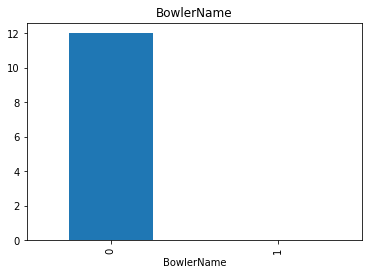

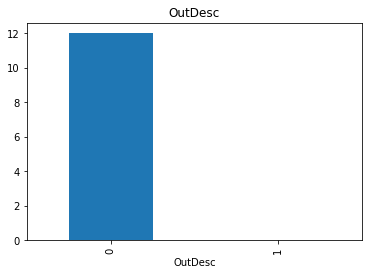

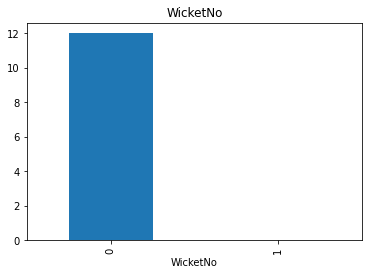

In [6]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['Runs'].median().plot.bar()
    plt.title(feature)
    plt.show()

## Numeric values

In [7]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  14


,MatchID,InningsNo,MatchPlayingOrder,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,WicketNo,AgainstFast,AgainstSpin
0,1,1,1,0,4,4,0,0,0,0,0,3.0,3,0
1,1,1,2,3,8,5,3,0,0,0,0,2.0,8,0
2,1,1,3,28,21,10,6,1,0,2,2,5.0,15,6
3,1,1,4,15,17,10,5,0,0,1,1,1.0,4,13
4,1,1,5,26,28,8,18,1,0,0,1,NaN,14,14


In [8]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 7


## Checking the relationship between the numeric features and dependent variables

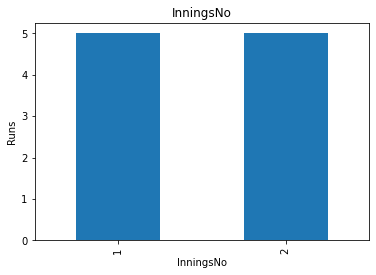

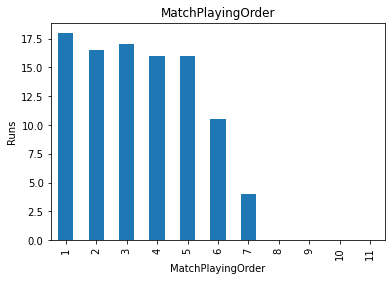

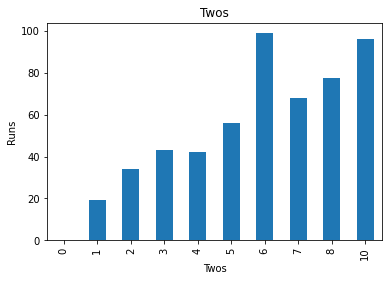

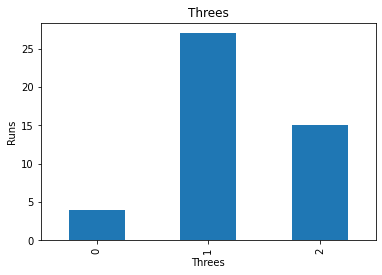

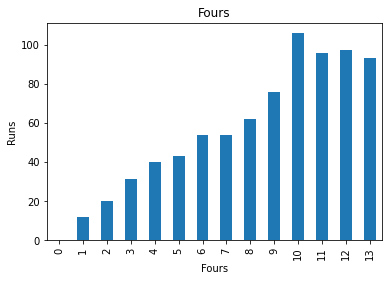

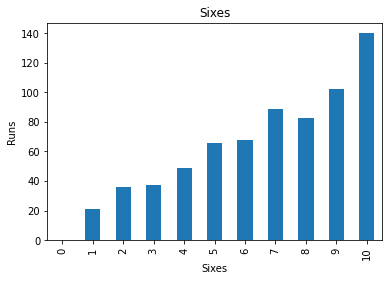

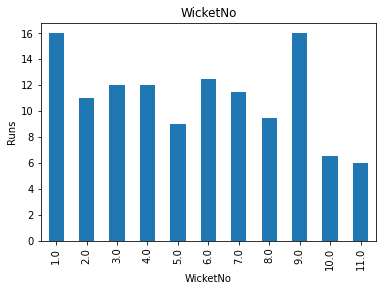

In [9]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['Runs'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Runs')
    plt.title(feature)
    plt.show()

## Continuous variables

In [10]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


## Understanding the distribution of continuous variables

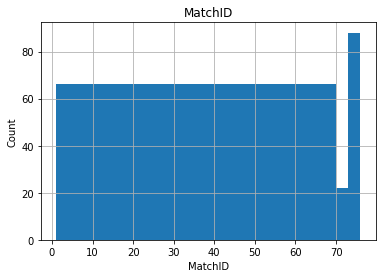

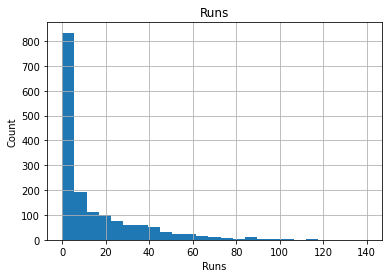

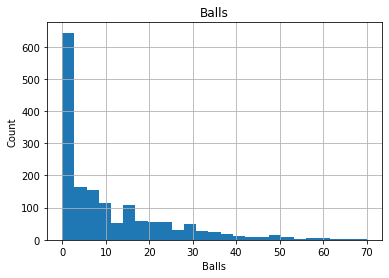

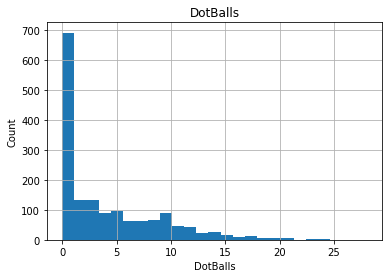

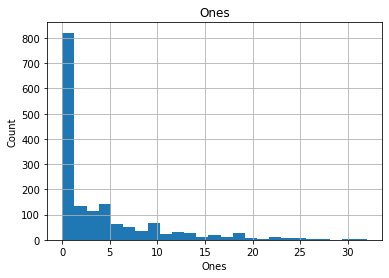

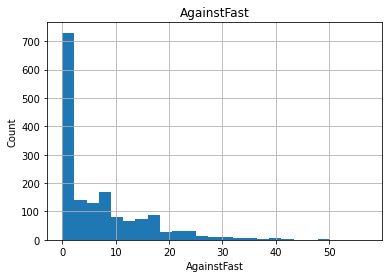

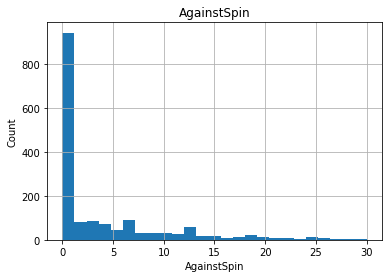

In [11]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

G:\PYTHON\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


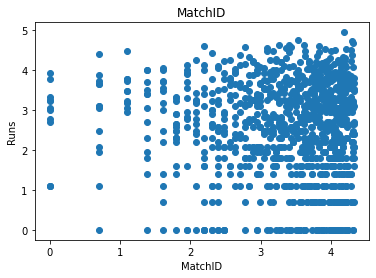

In [12]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Runs']=np.log(data['Runs'])
        plt.scatter(data[feature],data['Runs'])
        plt.xlabel(feature)
        plt.ylabel('Runs')
        plt.title(feature)
        plt.show()
        

## Checking the existence of Outliers 

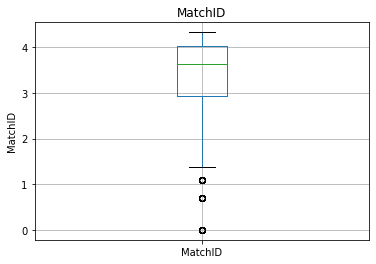

In [13]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [14]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['Team', 'PlayerName', 'BowlerName', 'OutDesc', 'StrikeRate']

In [15]:
dataset[categorical_features].head()

,Team,PlayerName,BowlerName,OutDesc,StrikeRate
0,CSK,Ruturaj Gaikwad,Umesh Yadav,c Nitish Rana b Umesh Yadav,0.00
1,CSK,Devon Conway,Umesh Yadav,c Shreyas Iyer b Umesh Yadav,37.50
2,CSK,Robin Uthappa,Varun Chakaravarthy,st Sheldon Jackson b Varun Chakaravarthy,133.33
3,CSK,Ambati Rayudu,Sunil Narine,run out (Shreyas Iyer),88.24
4,CSK,Ravindra Jadeja,NaN,not out,92.86


In [16]:

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Team and number of categories are 10
The feature is PlayerName and number of categories are 190
The feature is BowlerName and number of categories are 106
The feature is OutDesc and number of categories are 634
The feature is StrikeRate and number of categories are 360


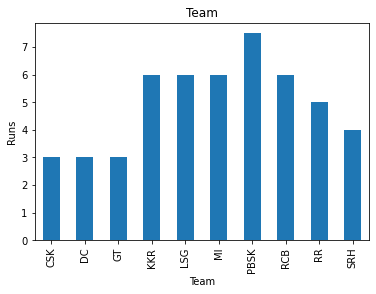

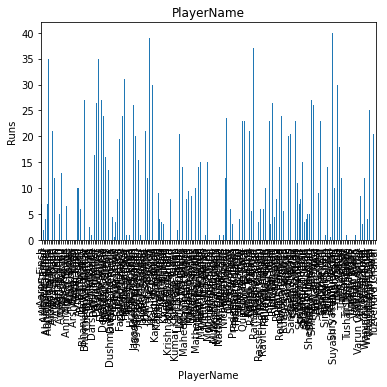

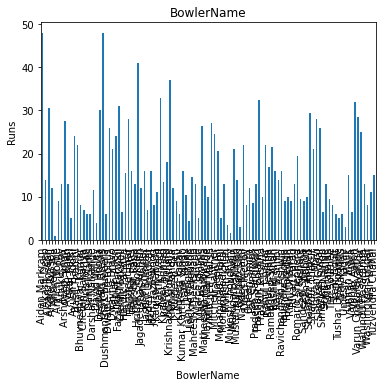

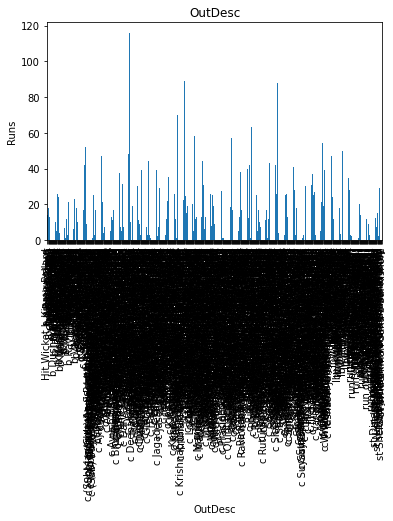

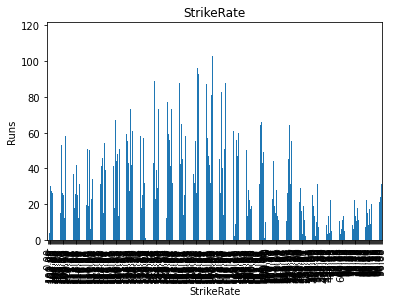

In [17]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Runs'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Runs')
    plt.title(feature)
    plt.show()

## Part 2 Feature Engineering

## Splitting the dataset into training set and training set

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['Runs'],test_size=0.1,random_state=0)
X_train.shape, X_test.shape

((1465, 19), (163, 19))

In [19]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

BowlerName: 0.4398% missing values
OutDesc: 0.2776% missing values


In [20]:
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

BowlerName    0
OutDesc       0
dtype: int64

## Finding the numeric variables having missing values

In [21]:
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

WicketNo: 0.4404% missing value


In [22]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

WicketNo    0
dtype: int64

In [23]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [24]:
categorical_features

['Team', 'PlayerName', 'BowlerName', 'OutDesc', 'StrikeRate']

In [25]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['Runs'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [26]:
dataset.head(10)

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin,WicketNonan
0,1,1,4,164,1,29,40,0,4,4,0,0,0,0,0,1,3.0,3,0,0
1,1,1,4,184,2,29,98,3,8,5,3,0,0,0,0,12,2.0,8,0,0
2,1,1,4,140,3,97,468,28,21,10,6,1,0,2,2,154,5.0,15,6,0
3,1,1,4,146,4,38,301,15,17,10,5,0,0,1,1,74,1.0,4,13,0
4,1,1,4,108,5,13,421,26,28,8,18,1,0,0,1,107,4.0,14,14,1
5,1,1,4,163,7,40,111,3,6,3,3,0,0,0,0,9,4.0,3,3,0
6,1,1,4,134,6,13,421,50,38,16,12,2,0,7,1,242,4.0,25,12,1
7,1,1,4,59,8,13,27,0,0,0,0,0,0,0,0,0,4.0,0,0,1
8,1,1,4,22,9,13,27,0,0,0,0,0,0,0,0,0,4.0,0,0,1
9,1,1,4,3,10,13,27,0,0,0,0,0,0,0,0,0,4.0,0,0,1


In [27]:
dataset.to_csv('X_train.csv',index=False)

## Part 3 Feature Selection

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [29]:
dataset=pd.read_csv('X_train.csv')

In [30]:
dataset.head()

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin,WicketNonan
0,1,1,4,164,1,29,40,0,4,4,0,0,0,0,0,1,3.0,3,0,0
1,1,1,4,184,2,29,98,3,8,5,3,0,0,0,0,12,2.0,8,0,0
2,1,1,4,140,3,97,468,28,21,10,6,1,0,2,2,154,5.0,15,6,0
3,1,1,4,146,4,38,301,15,17,10,5,0,0,1,1,74,1.0,4,13,0
4,1,1,4,108,5,13,421,26,28,8,18,1,0,0,1,107,4.0,14,14,1


In [31]:
## Capture the dependent feature
y_train=dataset[['Runs']]

In [32]:
## drop dependent feature from dataset
X_train=dataset.drop(['MatchID','Runs'],axis=1)

In [33]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features whose coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

G:\PYTHON\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e+02, tolerance: 6.688e+01
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [34]:
feature_sel_model.get_support()

array([False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False])

In [35]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 18
selected features: 14


In [36]:
selected_feat

Index(['Team', 'PlayerName', 'BowlerName', 'OutDesc', 'Balls', 'DotBalls',
       'Ones', 'Twos', 'Threes', 'Fours', 'Sixes', 'StrikeRate', 'AgainstFast',
       'AgainstSpin'],
      dtype='object')

In [37]:
X_train=X_train[selected_feat]

In [38]:
X_train.head()

,Team,PlayerName,BowlerName,OutDesc,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,AgainstFast,AgainstSpin
0,4,164,29,40,4,4,0,0,0,0,0,1,3,0
1,4,184,29,98,8,5,3,0,0,0,0,12,8,0
2,4,140,97,468,21,10,6,1,0,2,2,154,15,6
3,4,146,38,301,17,10,5,0,0,1,1,74,4,13
4,4,108,13,421,28,8,18,1,0,0,1,107,14,14


In [39]:
y_train

,Runs
0,0
1,3
2,28
3,15
4,26
...,...
1623,0
1624,0
1625,0
1626,0


In [40]:
X=X_train.values
y=y_train.values

In [41]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['MatchID','Runs'] ]
len(scaling_feature)

18

In [42]:
scaling_feature


['InningsNo',
 'Team',
 'PlayerName',
 'MatchPlayingOrder',
 'BowlerName',
 'OutDesc',
 'Balls',
 'DotBalls',
 'Ones',
 'Twos',
 'Threes',
 'Fours',
 'Sixes',
 'StrikeRate',
 'WicketNo',
 'AgainstFast',
 'AgainstSpin',
 'WicketNonan']

In [43]:
dataset.head()

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin,WicketNonan
0,1,1,4,164,1,29,40,0,4,4,0,0,0,0,0,1,3.0,3,0,0
1,1,1,4,184,2,29,98,3,8,5,3,0,0,0,0,12,2.0,8,0,0
2,1,1,4,140,3,97,468,28,21,10,6,1,0,2,2,154,5.0,15,6,0
3,1,1,4,146,4,38,301,15,17,10,5,0,0,1,1,74,1.0,4,13,0
4,1,1,4,108,5,13,421,26,28,8,18,1,0,0,1,107,4.0,14,14,1


In [44]:
feature_scale=[feature for feature in dataset.columns if feature not in ['MatchID','Runs']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [45]:
scaler.transform(dataset[feature_scale])

array([[0.        , 0.44444444, 0.86772487, ..., 0.05263158, 0.        ,
        0.        ],
       [0.        , 0.44444444, 0.97354497, ..., 0.14035088, 0.        ,
        0.        ],
       [0.        , 0.44444444, 0.74074074, ..., 0.26315789, 0.2       ,
        0.        ],
       ...,
       [1.        , 0.66666667, 0.0952381 , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.66666667, 0.17989418, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.66666667, 0.12169312, ..., 0.        , 0.        ,
        1.        ]])

## Part 4 Building the model on the training set

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
# from sklearn.linear_model import LinearRegression
# regressor=LinearRegression()
# regressor.fit(X_train,y_train)


from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=25,random_state=0)
regressor.fit(X_train,y_train)

C:\Users\Manmeet Singh\AppData\Local\Temp\ipykernel_9692\728795759.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(n_estimators=25, random_state=0)

In [55]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=3)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[ 42.    41.2 ]
 [ 73.    69.28]
 [  0.     0.  ]
 [  0.     0.  ]
 [ 56.    36.92]
 [  0.     0.  ]
 [ 14.    14.12]
 [  0.     0.  ]
 [ 49.    43.  ]
 [  0.     0.  ]
 [ 23.    25.52]
 [ 27.    26.92]
 [ 59.    62.6 ]
 [ 19.    24.84]
 [ 13.    10.68]
 [  5.     5.36]
 [ 15.    13.4 ]
 [  4.     5.  ]
 [ 23.    28.08]
 [ 49.    46.96]
 [ 18.    23.68]
 [ 26.    28.04]
 [  6.     6.28]
 [ 17.    15.44]
 [ 24.    17.88]
 [  0.     0.  ]
 [  0.     0.  ]
 [  0.     0.  ]
 [  6.     6.48]
 [ 24.    26.28]
 [  2.     2.  ]
 [ 11.     9.88]
 [  1.     1.  ]
 [  0.     0.  ]
 [  0.     0.  ]
 [  1.     1.  ]
 [  0.     0.  ]
 [ 16.    16.48]
 [  0.     0.  ]
 [  9.     8.64]
 [  1.     1.  ]
 [  2.     2.  ]
 [ 35.    37.24]
 [ 52.    51.16]
 [  4.     4.44]
 [  0.     0.  ]
 [  0.     0.  ]
 [  2.     2.08]
 [  0.     0.  ]
 [  0.     0.  ]
 [  0.     0.  ]
 [ 32.    34.64]
 [  1.     1.04]
 [  2.     2.04]
 [ 40.    30.72]
 [ 38.    36.72]
 [ 81.    76.72]
 [  0.     0.  ]
 [  0.     0. 

## Evaluating the performance of the model on the testing data

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.978160806144833

## Evaluating the performance of the model on the training data

In [50]:
train_y_pred=regressor.predict(X_train)
r2_score(y_train,train_y_pred)

0.9945282876273828

### ['Team', 'PlayerName', 'BowlerName', 'OutDesc', 'Balls', 'DotBalls','Ones', 'Twos', 'Threes', 'Fours', 'Sixes', 'StrikeRate', 'AgainstFast','AgainstSpin']

In [59]:
print(regressor.predict([[4,184,29,98,8,5,3,0,0,0,0,2,8,0]]))

[2.04]
